<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/NeuralNetworks_CNN_Classification_CIFARdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks - COnvilutional Neural Network

Convolutional neural networks (CNN) are all the rage in the deep learning community right now. These CNN models are being used across different applications and domains, and they’re especially prevalent in image and video processing projects. The building blocks of CNNs are filters a.k.a. kernels. Kernels are used to extract the relevant features from the input using the convolution operation.

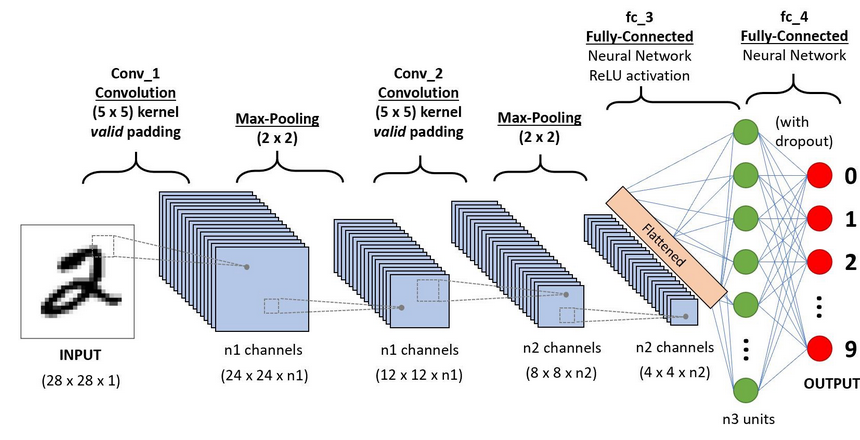

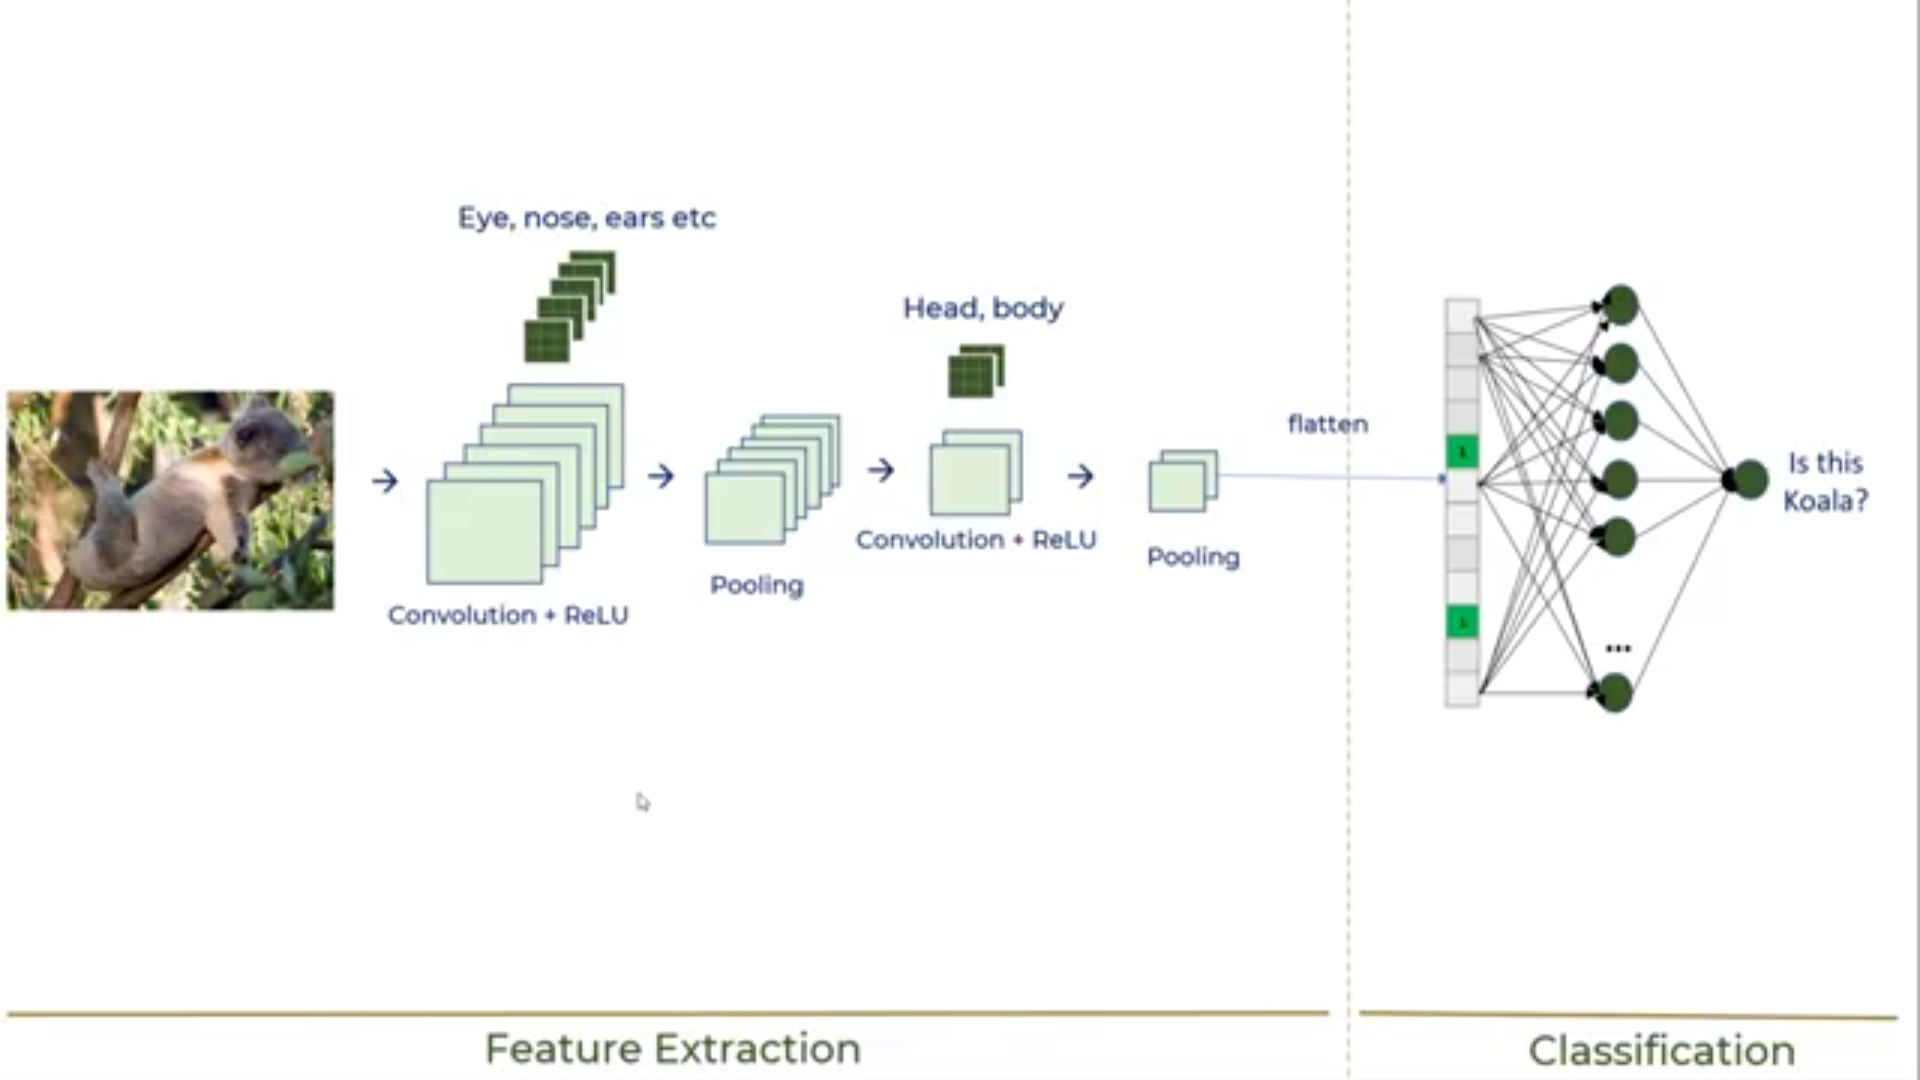

Activation Function :

    It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

The Activation Functions can be basically divided into 2 types-

1. Linear Activation Function 
2. Non-linear Activation Functions

Activation functions are a key part of neural network design.
The modern default activation function for hidden layers is the ReLU function.
The activation function for output layers depends on the type of prediction problem.

1. Activation Function for Hidden Layer :


    1. Rectified Linear Activation (ReLU)
    2. Logistic (Sigmoid)
    3. Hyperbolic Tangent (Tanh)

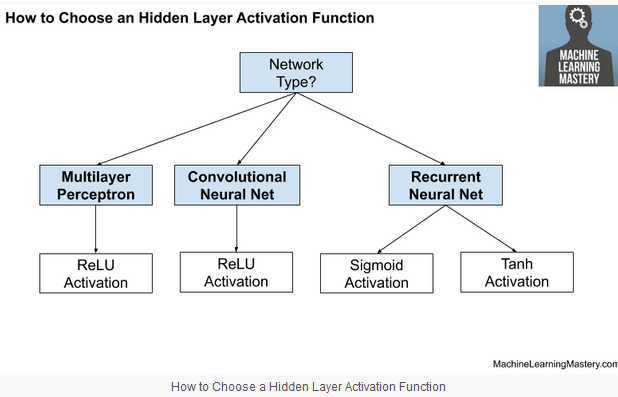

2. Activation Function for Output Layer :



    1. Linear
    2. Logistic (Sigmoid)
    3. Softmax

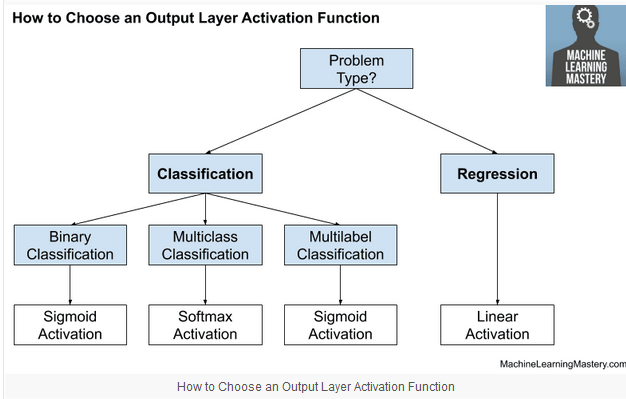

##Classification on CIFAR data

In [31]:
#Import all necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers,models

import matplotlib.pyplot as plt
import seaborn as sns

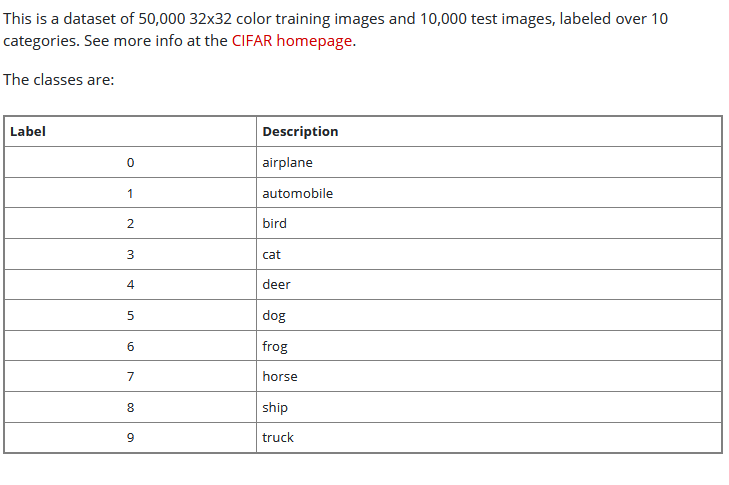

In [2]:
#Get data from tensorflow
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(xtrain.shape)
print(ytrain.shape)
print(xtrain[0].shape)
print(ytrain[0].shape)

(50000, 32, 32, 3)
(50000, 1)
(32, 32, 3)
(1,)


In [6]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
ytrain = ytrain.reshape(-1,)
ytest = ytest.reshape(-1,)
ytrain[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

Conclusion :

    Here we can observe 50000 images of size 32x32x3 (3D colour image RxGxB) of both training ans testing set.
    labels are in 2D array, we need to reshape in 1D array.

In [7]:
#Get labels 
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

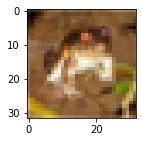

In [9]:
#plot image
plt.figure(figsize=(10,2))
plt.imshow(xtrain[0])

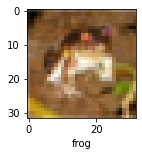

In [12]:
#Function to plot image
def plotimage(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

plotimage(xtrain,ytrain,0)

In [14]:
#Scaling Image
xtrain = xtrain / 255
xtest = xtest / 255

##Build and train CNN model

    1. CNN itself doesn't take care of rotation and scale therfore, training set should contain rotated and scaled samples.
      Use data augmentation method to generate new rotated images.
    2. Benifits of pooling layer - reduces dimensions and computation,
      reduces overfitting.

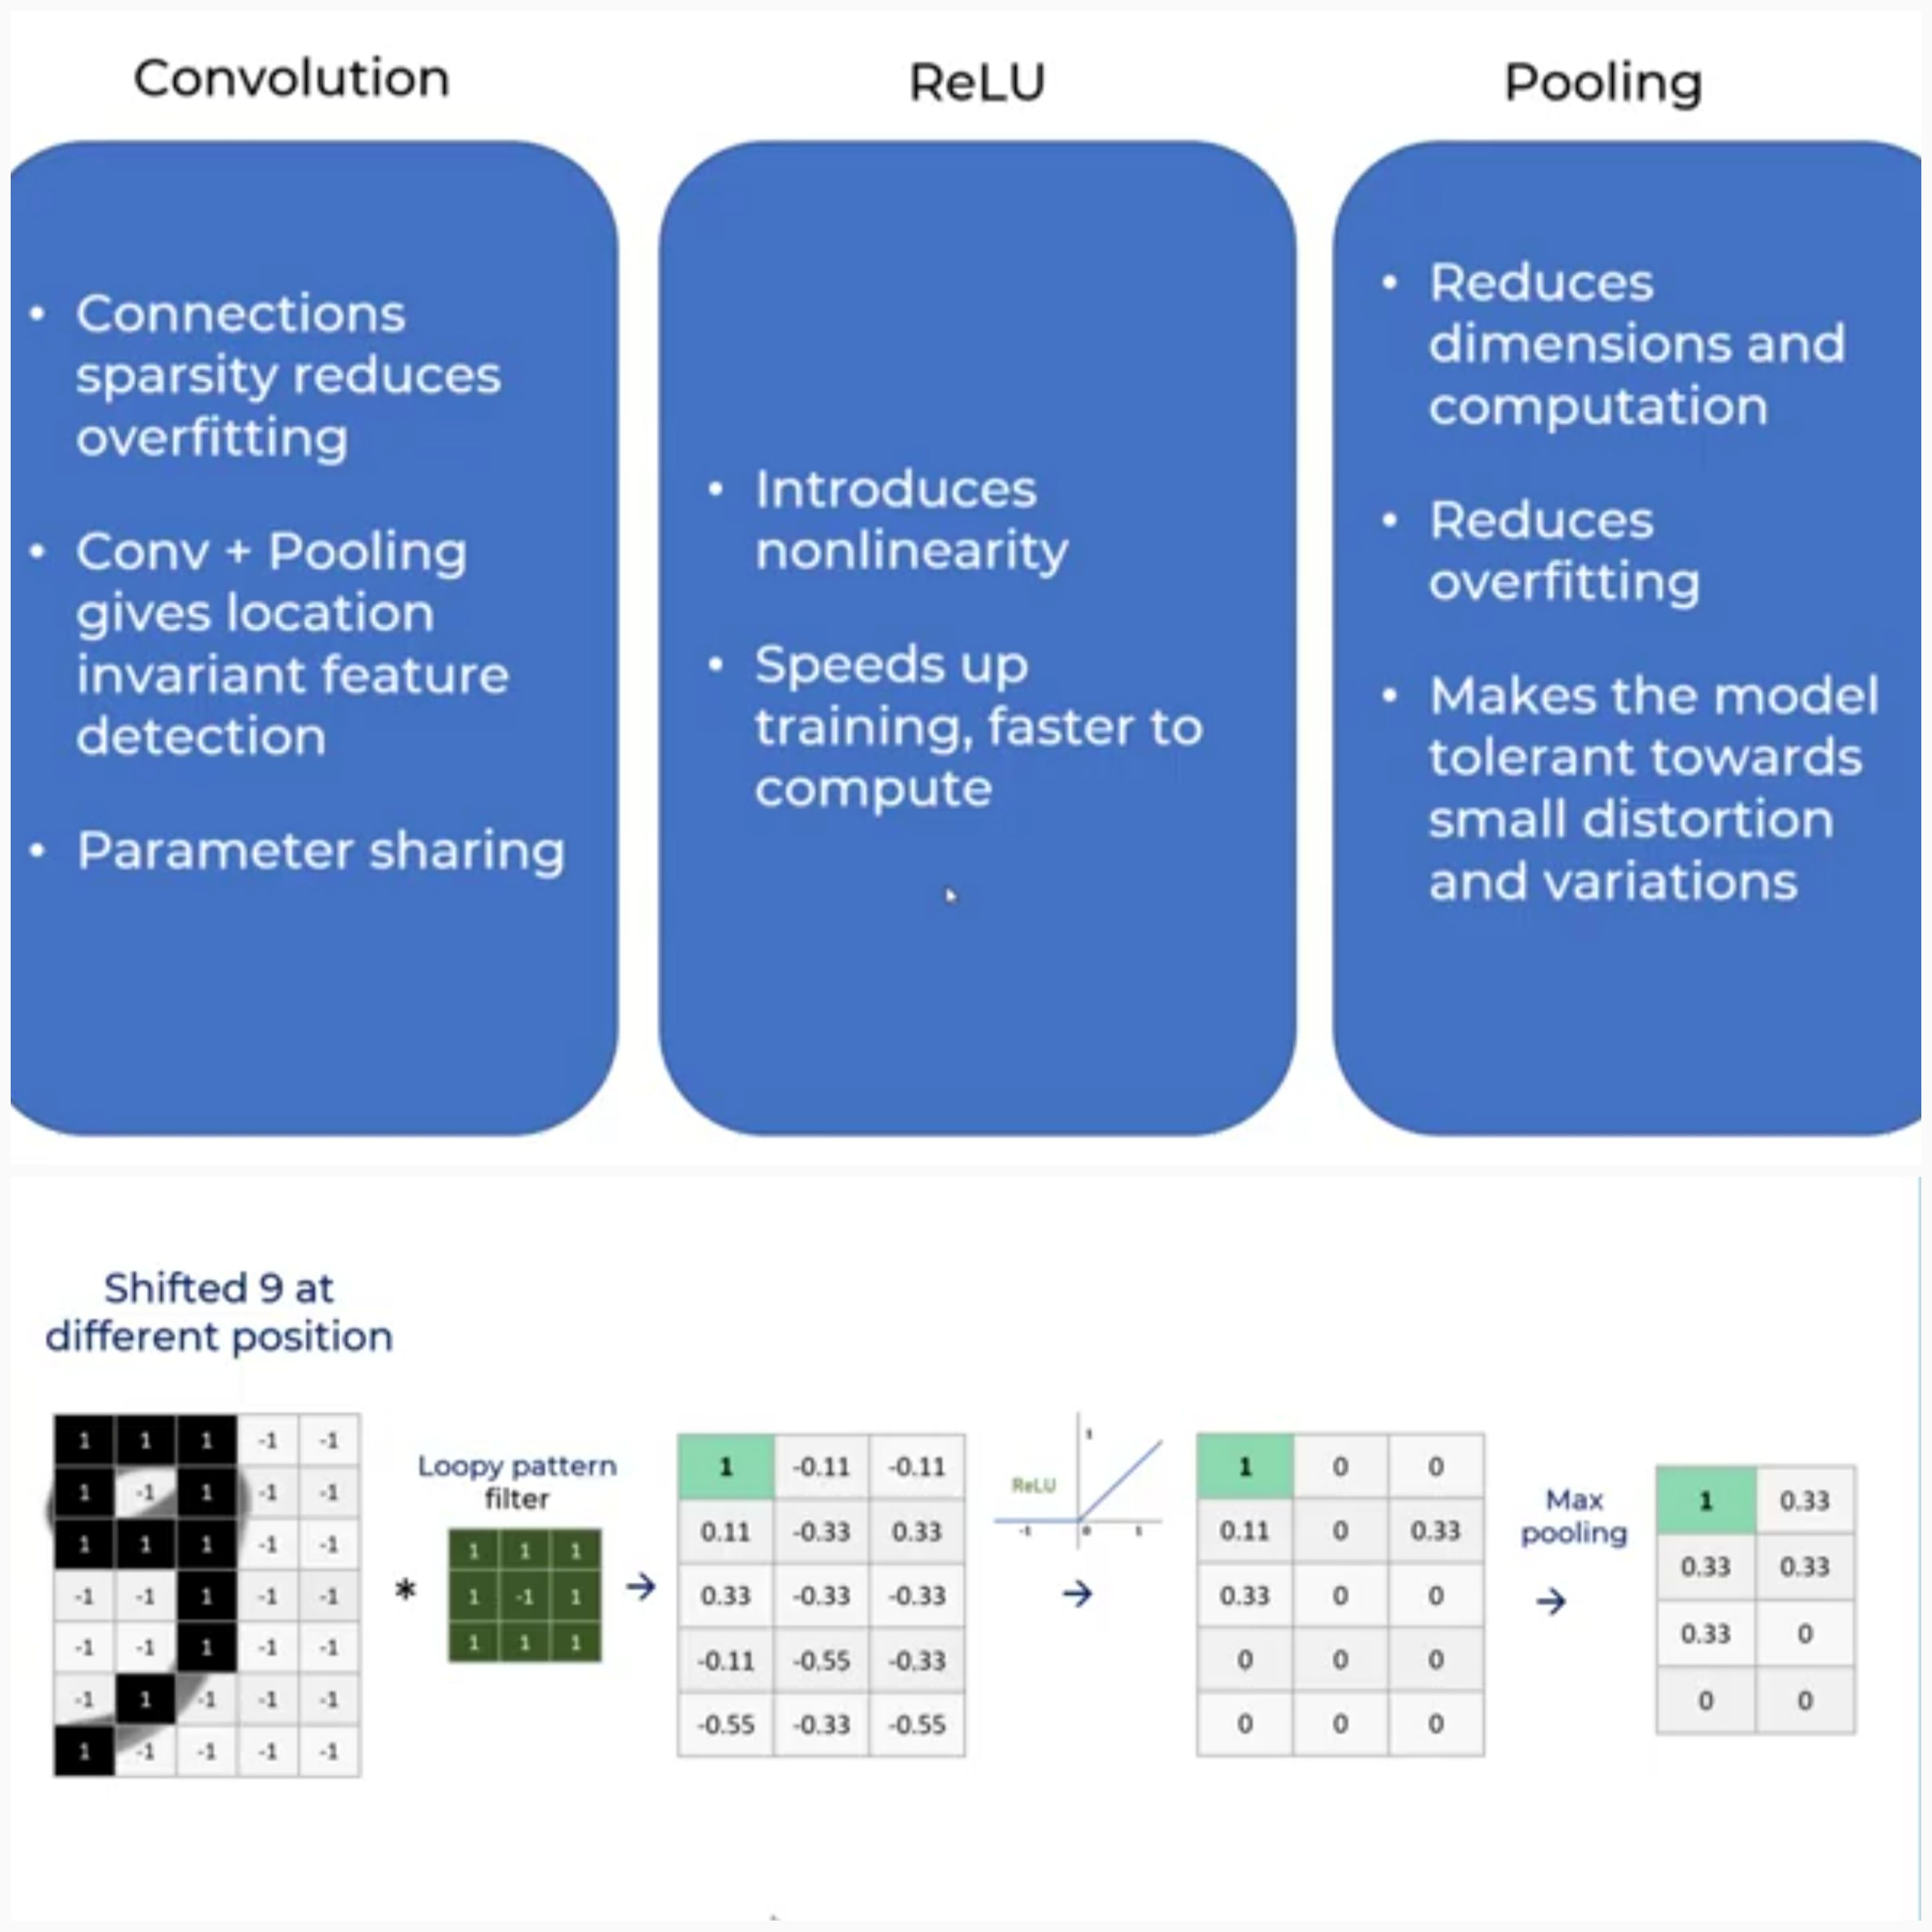

Feature Extraction in CNN :

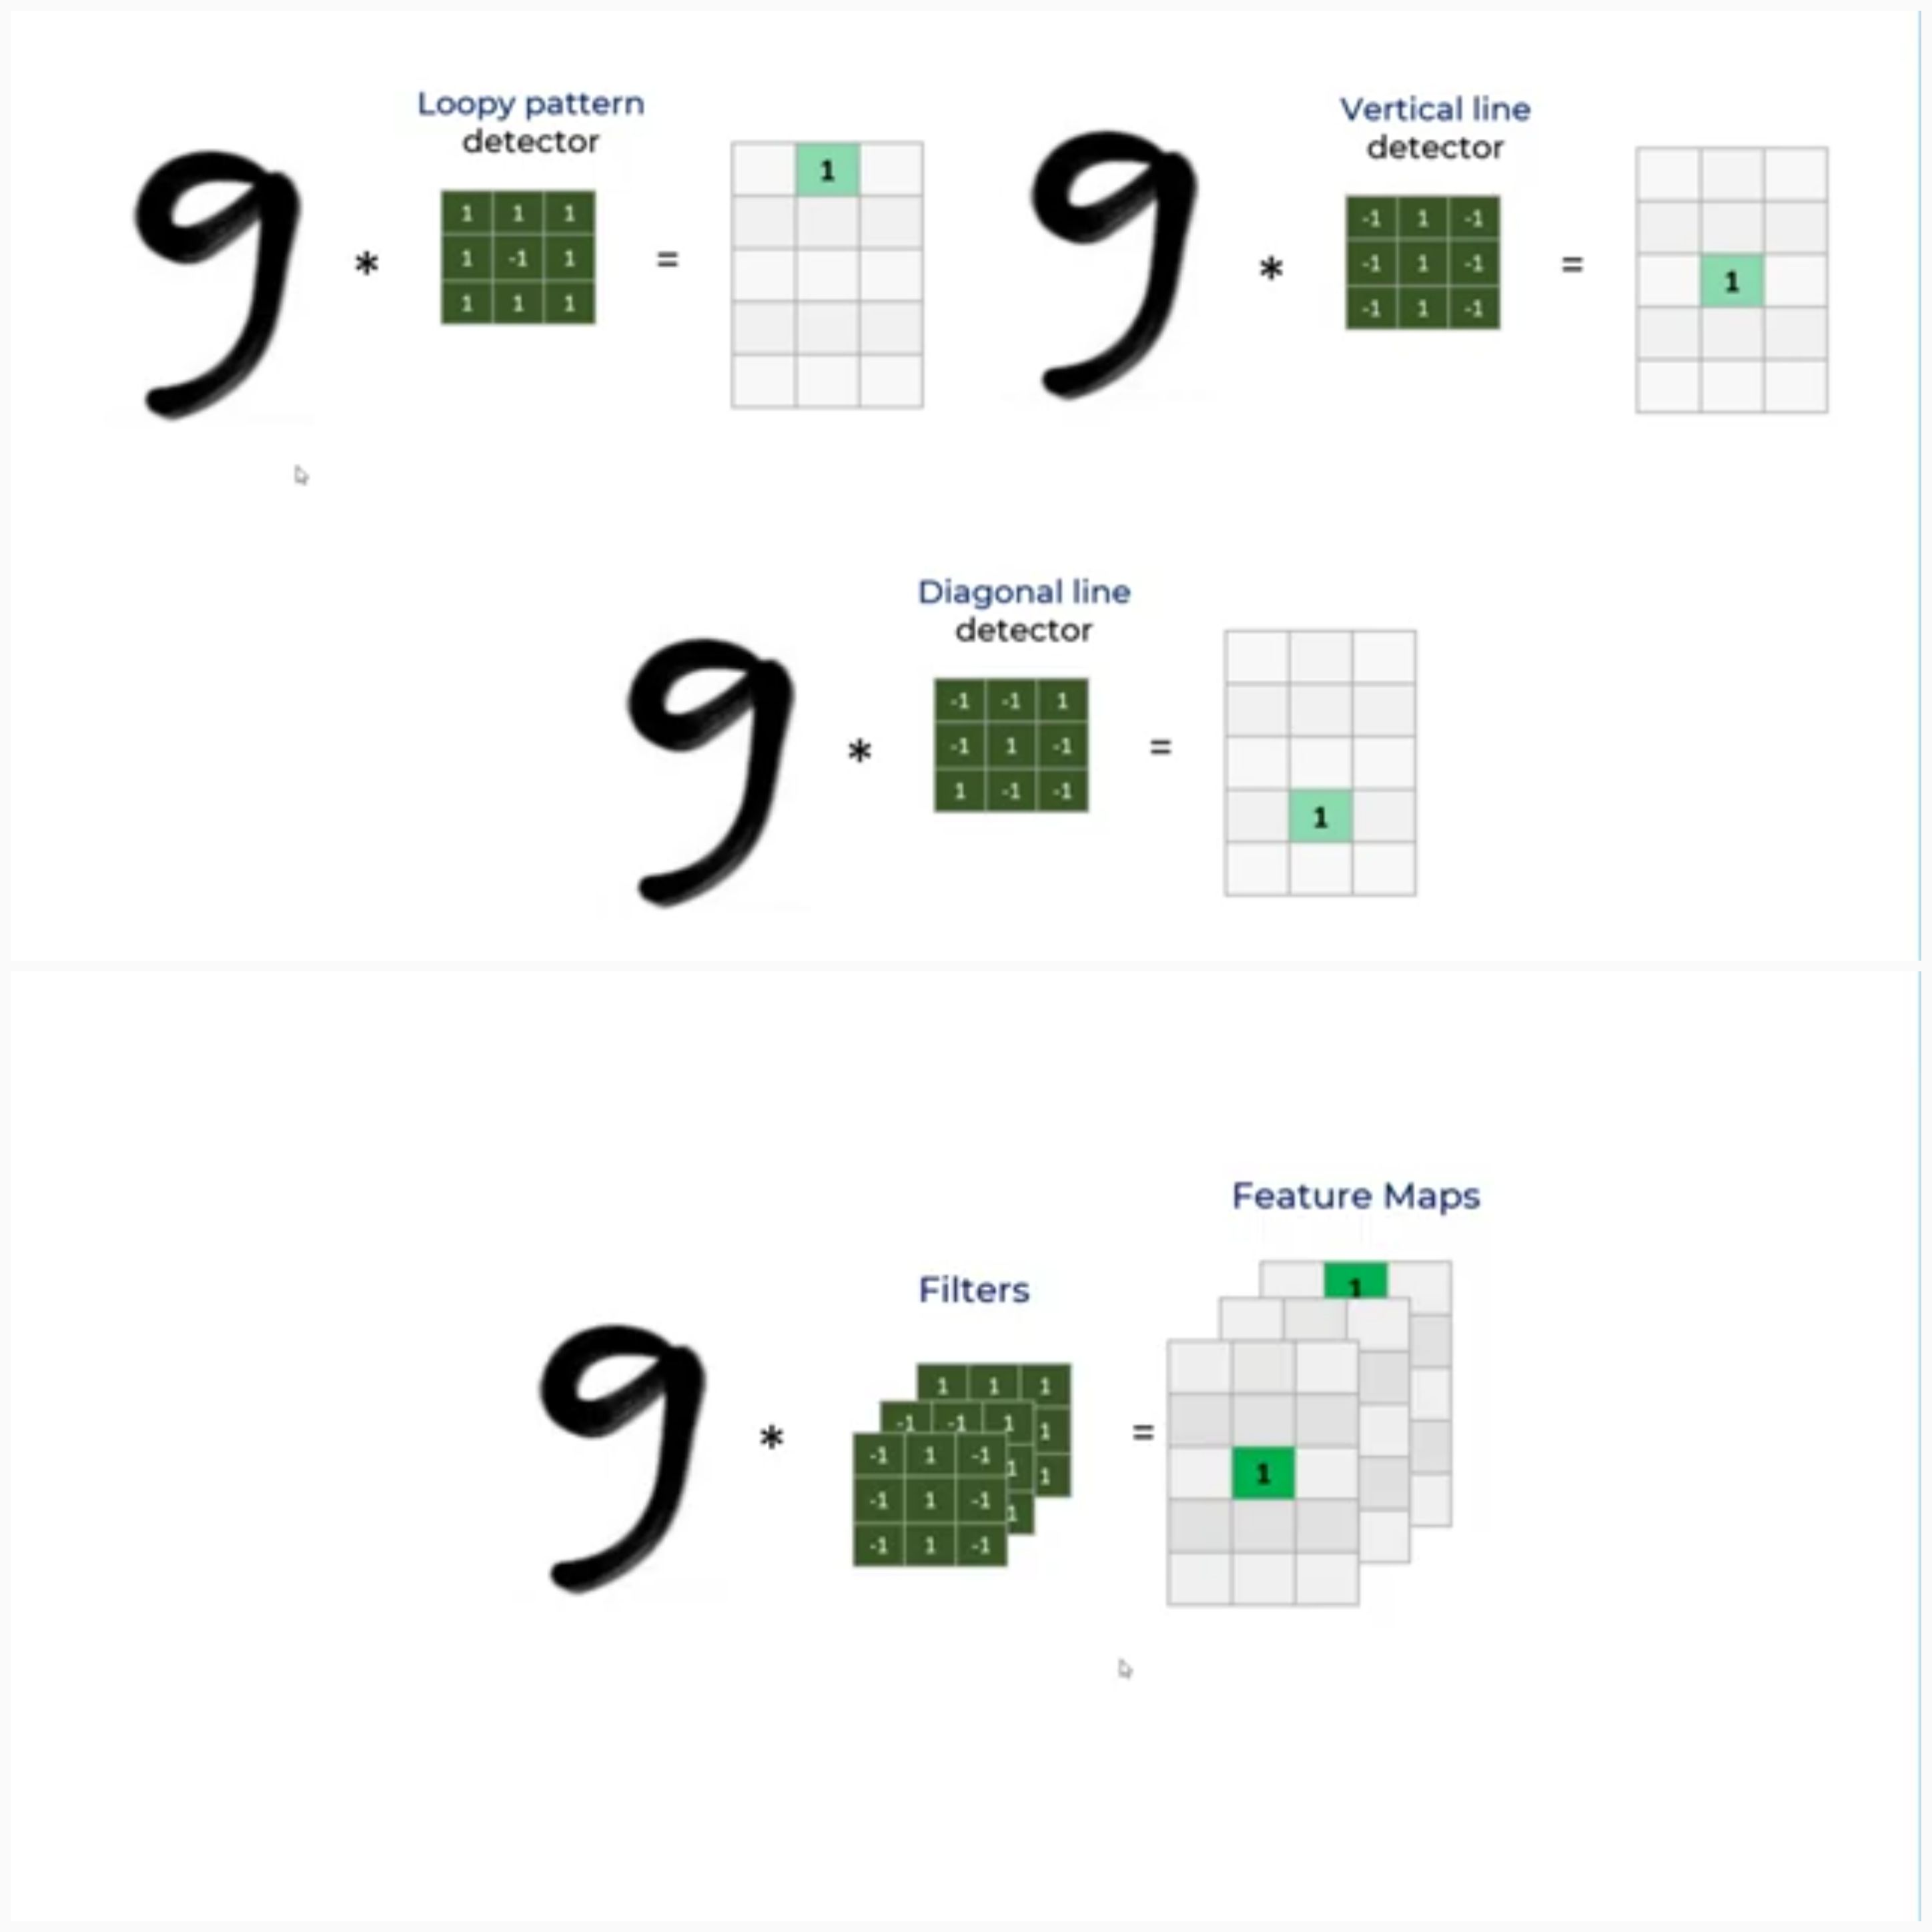

In [18]:
cnn = models.Sequential([
                         #cnn for feature extraction
                         #filters =  no. of filters applied to extract features....3  filters in above reference image. 
                         #kernel_size = size of filter...3x3 in above reference image.
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                         #maxpooling and avgpooling reduces dimensions comparing with 2x2 size as seen in refered image
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         #We can add any number of layers. Model will train with try and error. 
                         #The parameters plays important role in feature extraction 


                         #dense for classification
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(128,activation='relu'),
                         tf.keras.layers.Dense(10,activation='softmax')   #softmax normalizes probability of classes, Sum of all = 1
])

In [20]:
cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #from_logits= True for error
              optimizer='adam',metrics=['accuracy'])

history = cnn.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 53s 33ms/step - loss: 1.4398 - accuracy: 0.4834
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0883 - accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9648 - accuracy: 0.6634
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8798 - accuracy: 0.6947
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8071 - accuracy: 0.7193
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7460 - accuracy: 0.7410
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6913 - accuracy: 0.7584
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6397 - accuracy: 0.7768
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5934 - accuracy: 0.7921
Epoch 10/10
1563/1563 [==============================] - 50s 32ms/step - lo

In [22]:
#save model to use further for deployment 
cnn.save_weights('/content/digitRecognition.h5')

In [24]:
test_loss,test_acc=cnn.evaluate(xtest,ytest)
print("Training accuracy is {} with Training Loss {}".format(test_acc,test_loss))

 13/313 [>.............................] - ETA: 2s - loss: 0.9550 - accuracy: 0.6875

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 3s 9ms/step - loss: 0.9839 - accuracy: 0.6849
Training accuracy is 0.6848999857902527 with Training Loss 0.9839330911636353


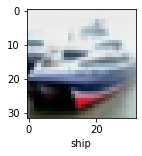

In [26]:
plotimage(xtest,ytest,1)

In [27]:
ypred = cnn.predict(xtest)
ypred[0]

array([8.25605937e-04, 1.21653546e-03, 1.70768541e-03, 5.20706892e-01,
       2.16129678e-03, 4.41410214e-01, 5.87873219e-04, 1.87752061e-02,
       1.23794135e-02, 2.29326120e-04], dtype=float32)

In [29]:
ypred_classes = [np.argmax(element) for element in ypred]
ypred_classes[1]

8

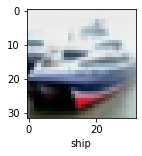

In [30]:
plotimage(xtest,ypred_classes,1)

Text(51.0, 0.5, 'Truth')

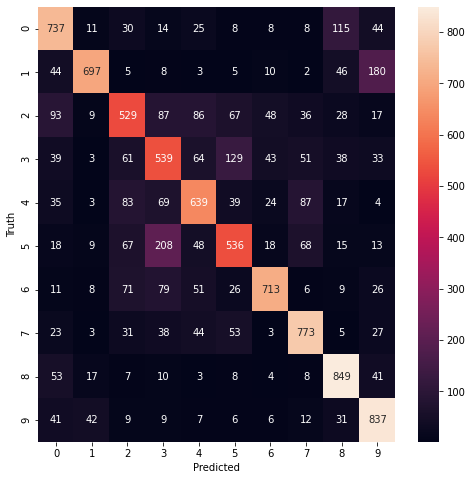

In [32]:
cm = tf.math.confusion_matrix(ytest,ypred_classes)

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

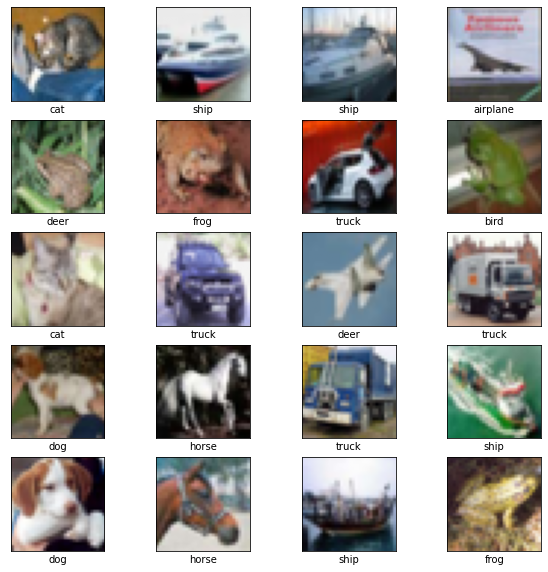

In [33]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtest[i],cmap=plt.cm.binary)
  plt.xlabel(classes[ypred_classes[i]])
  plt.xticks([])
  plt.yticks([])